In [38]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Importing library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:
dataset=pd.read_csv("car_data.csv")
dataset.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [41]:
# Basic analysis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [42]:
dataset.describe(include='all')

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,516,NaN,NaN,NaN
mean,500.500000,NaN,40.106000,72689.000000,0.402000
std,288.819436,NaN,10.707073,34488.341867,0.490547
min,1.000000,NaN,18.000000,15000.000000,0.000000
25%,250.750000,NaN,32.000000,46375.000000,0.000000
50%,500.500000,NaN,40.000000,72000.000000,0.000000
75%,750.250000,NaN,48.000000,90000.000000,1.000000


In [43]:
dataset.nunique()

User ID         1000
Gender             2
Age               46
AnnualSalary     247
Purchased          2
dtype: int64

In [44]:
# Getting rid of useless column'
Useless_column = ['User ID']
Data = dataset.drop(Useless_column,axis=1)
Data.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [45]:
# PLotting the data
Categorical_Columns=['Gender','Purchased']
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5),sharey=False)
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

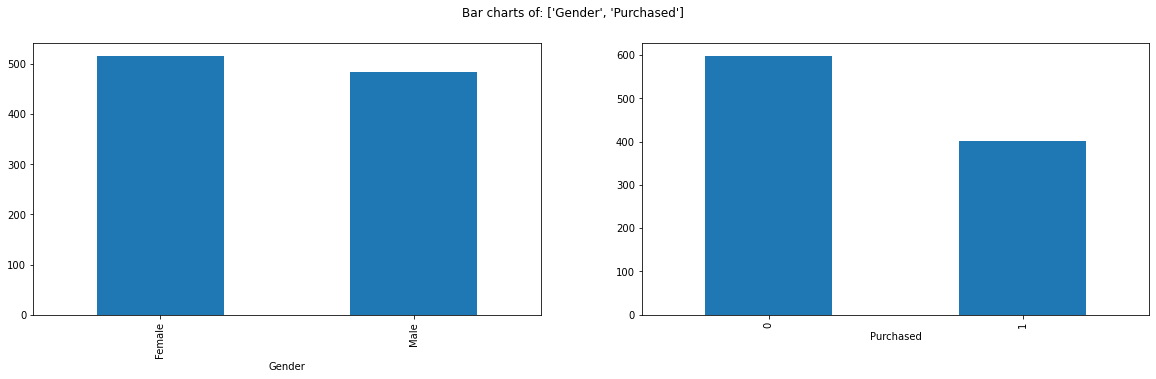

In [46]:
PlotBarCharts(inpData=Data,colsToPlot=Categorical_Columns)

[]

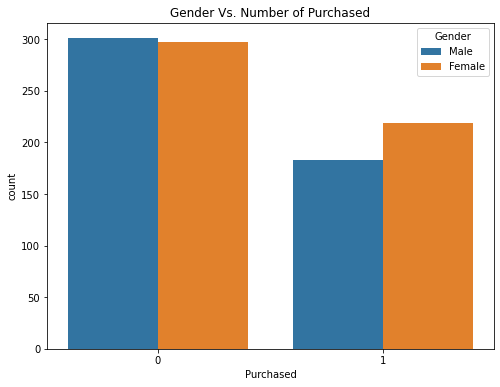

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data,x="Purchased",hue="Gender")
plt.title("Gender Vs. Number of Purchased")
plt.plot()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'AnnualSalary'}>]], dtype=object)

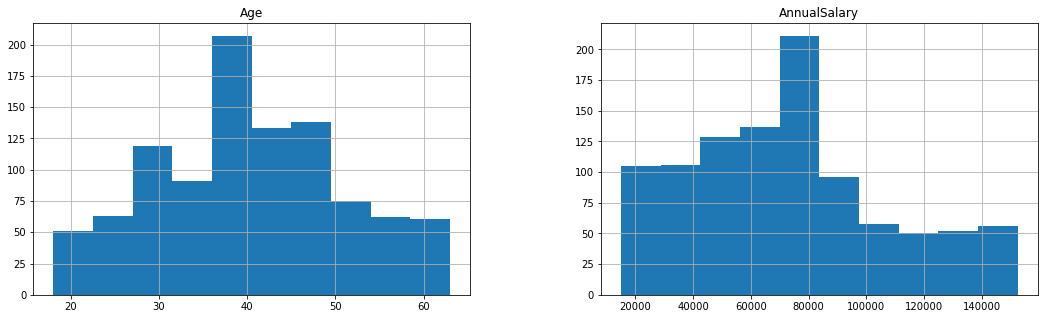

In [48]:
# Plotting histogram for the Continious Variables
Data.hist(['Age', 'AnnualSalary'], figsize=(18,5))

In [49]:
# outlier treatment
for column in Data_For_ML.columns[0:-1]:
    q1=Data_For_ML[column].quantile(0.25)
    q3=Data_For_ML[column].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    upper_limit=q3+(1.5*iqr)
    Data_For_ML[column]=np.where(Data_For_ML[column]<=lower_limit,lower_limit,Data_For_ML[column])
    Data_For_ML[column]=np.where(Data_For_ML[column]>=upper_limit,upper_limit,Data_For_ML[column])

NameError: name 'Data_For_ML' is not defined

In [ ]:
Data_For_ML.shape

In [50]:
new = pd.DataFrame(dataset.groupby(["Gender","Purchased"]).agg(min_salary=("AnnualSalary","min"),max_salary=("AnnualSalary","max"),average_salary=("AnnualSalary","mean")).reset_index())
new

,Gender,Purchased,min_salary,max_salary,average_salary
0,Female,0,15000,136500,63619.528620
1,Female,1,20000,151500,89968.036530
2,Male,0,15000,143500,61144.518272
3,Male,1,20000,152500,85718.579235


In [51]:
from sklearn.preprocessing import LabelEncoder
Data_For_ML = Data.copy()
le=LabelEncoder()
Data_For_ML["Gender"]=le.fit_transform(Data_For_ML["Gender"]) # 1 for male and 0 for female
Data_For_ML.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [52]:
Data_For_ML.dtypes

Gender          int32
Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

In [53]:
Target = ['Purchased']
Predictors = ['Gender','Age','AnnualSalary']

In [54]:
# Training the model
x=Data_For_ML.drop("Purchased",axis=1)
y=Data_For_ML["Purchased"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

In [55]:
x.shape
y.shape

(1000,)

In [56]:
# Priint shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 3)
(300, 3)
(700,)
(300,)


In [57]:
from sklearn.linear_model import LogisticRegression
modellog=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
modellog.fit(X_train,y_train)
# Prediction
Predict_log = modellog.predict(X_test)
Predict_log
from sklearn import metrics

print(metrics.classification_report(y_test, Predict_log))
print(metrics.confusion_matrix(Predict_log, y_test))

F1_Score=metrics.f1_score(y_test, Predict_log, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,))

from sklearn.model_selection import cross_val_score

Accuracy_Values_Logistic=cross_val_score(modellog, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_Logistic)
print('\nFinal Average Accuracy of the model:', str(round(round(Accuracy_Values_Logistic.mean(),2) * 100)) + '%')

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       184
           1       0.84      0.75      0.79       116

    accuracy                           0.85       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.85      0.85      0.85       300

[[168  29]
 [ 16  87]]
Accuracy of the model on Testing Sample Data: 1

Accuracy values for 10-fold Cross Validation:
 [0.82515558 0.74945078 0.85765766 0.7872     0.92906667 0.85935267
 0.79796265 0.848      0.78449574 0.79392361]

Final Average Accuracy of the model: 82%


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
# QDA
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
Predict_qda  = qda.predict(X_test)

print(metrics.classification_report(y_test, Predict_qda))
print(metrics.confusion_matrix(Predict_qda, y_test))

Accuracy_Values_Qda=cross_val_score(qda, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_Qda)
print('\nFinal Average Accuracy of the model:', str(round(round(Accuracy_Values_Qda.mean(),2) * 100)) + '%')

print('*'*100)

# LDA

lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
Predict_lda  = lda.predict(X_test)

print(metrics.classification_report(y_test, Predict_lda))
print(metrics.confusion_matrix(Predict_lda, y_test))

Accuracy_Values_lda=cross_val_score(lda, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values_lda)
print('\nFinal Average Accuracy of the model:', str(round(round(Accuracy_Values_lda.mean(),2) * 100)) + '%')


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       184
           1       0.88      0.86      0.87       116

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[171  16]
 [ 13 100]]

Accuracy values for 10-fold Cross Validation:
 [0.90980228 0.84059529 0.88975834 0.87025625 0.9101774  0.9196301
 0.85935267 0.90037205 0.8472     0.92045696]

Final Average Accuracy of the model: 89%
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       184
           1       0.85      0.76      0.80       116

    accuracy                           0.86       300
   macro avg       0.86      0.84      0.85       300
weighted avg       0.86      0.86      0.85       300

[[169  28]
 [ 15  88

In [59]:
# Comparing the data
comparing=pd.DataFrame({"Actual Value":y_test,
                        "Predicted Value Using LR":Predict_log,
                        "Predicted Value Using LDA":Predict_lda,
                        "Predicted Value Using QDA":Predict_qda})
comparing.sample(5)

,Actual Value,Predicted Value Using LR,Predicted Value Using LDA,Predicted Value Using QDA
653,0,0,0,0
476,0,0,0,0
974,0,0,0,0
334,1,1,1,1
802,1,1,1,1


In [60]:
# Final Accuracy score and model selection
print('\nFinal Average Accuracy of the model Logistic regression:', str(round(round(Accuracy_Values_Logistic.mean(),2) * 100)) + '%')
print('\nFinal Average Accuracy of the model QDA :', str(round(round(Accuracy_Values_Qda.mean(),2) * 100)) + '%')
print('\nFinal Average Accuracy of the model Lda:', str(round(round(Accuracy_Values_lda.mean(),2) * 100)) + '%')


Final Average Accuracy of the model Logistic regression: 82%

Final Average Accuracy of the model QDA : 89%

Final Average Accuracy of the model Lda: 82%


In [95]:
# Predicting with new data
NewData=pd.DataFrame(data=[[1,35,50000],
                           [0,45,70000],
                           [1,65,1200000],
                           [1,80,500000]], columns=Predictors)
NewData

,Gender,Age,AnnualSalary
0,1,35,50000
1,0,45,70000
2,1,65,1200000
3,1,80,500000


In [96]:
NewData.dtypes

Gender          int64
Age             int64
AnnualSalary    int64
dtype: object

In [97]:
def predict_Car(Inpdata):
    FinalData = NewData.values
    pred=qda.predict(FinalData)
    Inpdata['prediction_Purchased']=pred
    return(Inpdata)

In [98]:
new=predict_Car(NewData)

In [99]:
new

,Gender,Age,AnnualSalary,prediction_Purchased
0,1,35,50000,0
1,0,45,70000,0
2,1,65,1200000,1
3,1,80,500000,1


In [101]:
new['Gender'].replace({1:'Male',0:'Female'},inplace=True)

In [93]:
new['prediction_Purchased'].replace({1:'Yes',0:'No'},inplace=True)

In [102]:
# Getting final prediction
new

,Gender,Age,AnnualSalary,prediction_Purchased
0,Male,35,50000,0
1,Female,45,70000,0
2,Male,65,1200000,1
3,Male,80,500000,1
